# Lab Rotation - Nuno Martinho (3)

### Morgan Fingerprints -  PCA & t-SNE

##### rdkit github greglandrum

In [15]:
# Inputs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from __future__ import print_function
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [16]:
# Upload information

Table = pd.read_csv("Database_curated_WithMorgan.csv")
fingerprints_array = np.load('Morgan_Fingerprints.npy')

In [17]:
# Add Morgan Fingerprints to my Table dataframe

Table["Morgan Fingerprints"] = fingerprints_array.tolist()

In [18]:
# Compute PCA

pca = PCA(n_components=2, random_state=0)
pca_arr = pca.fit_transform(fingerprints_array.tolist())
pca_df = pd.DataFrame(pca_arr, columns=["PC_1", "PC_2"])

pca_df["Active/Inactive"] = Table["Active/Inactive"]

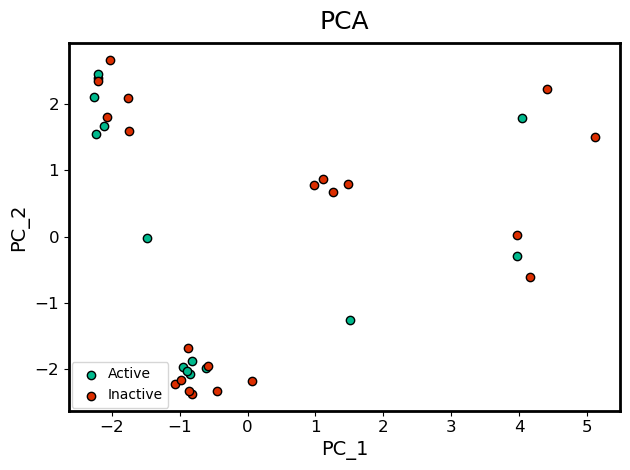

In [19]:
fig, ax = plt.subplots()
active_points = pca_df[pca_df["Active/Inactive"] == 1]
inactive_points = pca_df[pca_df["Active/Inactive"] == 0]
ax.scatter(active_points["PC_1"], active_points["PC_2"], c='#00B98D', label='Active', edgecolors="black")
ax.scatter(inactive_points["PC_1"], inactive_points["PC_2"], c='#DC2E00', label='Inactive', edgecolors="black")

ax.set_ylabel('PC_2', fontsize=14)
ax.set_xlabel('PC_1', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(label="PCA", fontsize=18, pad=10)
ax.legend(fontsize=10, borderaxespad=0.2, handletextpad=0.2, loc="best")
border_linewidth = 2  # Adjust the linewidth as needed
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(border_linewidth)
ax.spines['right'].set_linewidth(border_linewidth)
ax.spines['bottom'].set_linewidth(border_linewidth)
ax.spines['left'].set_linewidth(border_linewidth)

plt.tight_layout()
plt.savefig("PCA.svg", dpi=600)
plt.show()

In [20]:
# Compute t-SNE/t-Distributed Stochastic Neighborhood Embedding

tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_arr = tsne.fit_transform(fingerprints_array)
tsne_df = pd.DataFrame(tsne_arr, columns=["TSNE-1", "TSNE-2"])

tsne_df["Active/Inactive"] = Table["Active/Inactive"]

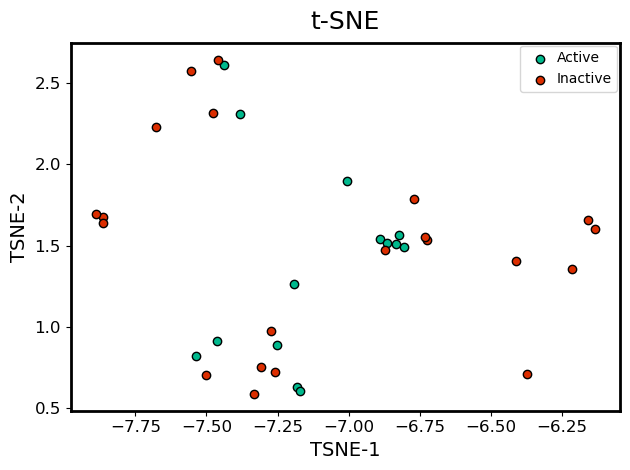

In [21]:
fig, ax = plt.subplots()
active_points = tsne_df[tsne_df["Active/Inactive"] == 1]
inactive_points = tsne_df[tsne_df["Active/Inactive"] == 0]
ax.scatter(active_points["TSNE-1"], active_points["TSNE-2"], c='#00B98D', label='Active', edgecolors="black")
ax.scatter(inactive_points["TSNE-1"], inactive_points["TSNE-2"], c='#DC2E00', label='Inactive', edgecolors="black")

ax.set_ylabel('TSNE-2', fontsize=14)
ax.set_xlabel('TSNE-1', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(label="t-SNE", fontsize=18, pad=10)
ax.legend(fontsize=10, borderaxespad=0.2, handletextpad=0.2, loc="best")
border_linewidth = 2  # Adjust the linewidth as needed
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(border_linewidth)
ax.spines['right'].set_linewidth(border_linewidth)
ax.spines['bottom'].set_linewidth(border_linewidth)
ax.spines['left'].set_linewidth(border_linewidth)

plt.tight_layout()
plt.savefig("TSNE.svg", dpi=600)
plt.show()